# 주택 가격 예측하기!

이번 퀘스트의 목표는 여러 특성들을 종합적으로 고려하여 가장 주택 가격을 잘 예측하는 회귀모델을 만드는 것입니다.

- 예측할 값(y): SalePrice
- 평가지표: RMSE
- Ames 주택가격 회귀 실습
  1. EDA
  2. 전처리
  3. 모델비교
  4. 앙상블
  5. 하이퍼튜닝

예시 형식:
~~~
Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.
~~~

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/modu-ds6-house-prices-prediction/sample_submission.csv
/kaggle/input/modu-ds6-house-prices-prediction/train.csv
/kaggle/input/modu-ds6-house-prices-prediction/test.csv


### 데이터 불러오기

In [2]:
train_df = pd.read_csv('/kaggle/input/modu-ds6-house-prices-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/modu-ds6-house-prices-prediction/test.csv')

### 데이터 이해 및 탐색(EDA)

In [3]:
train_df.shape, test_df.shape

((1168, 81), (292, 80))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

특성이 너무 많습니다! 어떻게 하면 좋을까요?

참고로 각각의 특성은 다음을 나타냅니다.

| 변수명               | 설명 (한국어)                         |
| ----------------- | -------------------------------- |
| **SalePrice**     | 주택의 판매 가격(달러). 예측해야 하는 타겟 변수     |
| **MSSubClass**    | 건물 등급(건물 종류 분류)                  |
| **MSZoning**      | 토지 용도 구분(일반적인 구역 분류)             |
| **LotFrontage**   | 도로에 접한 토지 길이 (피트 단위)             |
| **LotArea**       | 토지 면적 (평방 피트)                    |
| **Street**        | 도로 접근 방식                         |
| **Alley**         | 골목(후면 도로) 접근 방식                  |
| **LotShape**      | 토지의 전반적인 모양                      |
| **LandContour**   | 토지의 평탄도                          |
| **Utilities**     | 사용 가능한 공공시설(전기, 수도 등)            |
| **LotConfig**     | 토지 배치 형태                         |
| **LandSlope**     | 토지의 경사도                          |
| **Neighborhood**  | Ames 시 내의 물리적 위치(주변 지역)          |
| **Condition1**    | 주요 도로·철도에 대한 근접도                 |
| **Condition2**    | 두 번째 주요 도로·철도에 대한 근접도            |
| **BldgType**      | 주거 건물 유형 (단독, 다세대 등)             |
| **HouseStyle**    | 주택의 건축 양식                        |
| **OverallQual**   | 자재 및 마감 품질 종합 평가                 |
| **OverallCond**   | 주택의 전반적인 상태 평가                   |
| **YearBuilt**     | 최초 건축 연도                         |
| **YearRemodAdd**  | 리모델링/개조 연도                       |
| **RoofStyle**     | 지붕 스타일                           |
| **RoofMatl**      | 지붕 재료                            |
| **Exterior1st**   | 외장 마감재(주 재료)                     |
| **Exterior2nd**   | 외장 마감재(보조 재료, 2번째)               |
| **MasVnrType**    | 석조 베니어 타입                        |
| **MasVnrArea**    | 석조 베니어 면적 (평방 피트)                |
| **ExterQual**     | 외장재 품질 평가                        |
| **ExterCond**     | 외장재 상태 평가                        |
| **Foundation**    | 기초(Foundation) 유형                |
| **BsmtQual**      | 지하실 높이 평가                        |
| **BsmtCond**      | 지하실 상태 평가                        |
| **BsmtExposure**  | 지하실 외부 노출 여부(출입구/창문 등)           |
| **BsmtFinType1**  | 주요 지하실 마감 구역 유형                  |
| **BsmtFinSF1**    | 주요 지하실 마감 면적 (평방 피트)             |
| **BsmtFinType2**  | 보조 지하실 마감 구역 유형                  |
| **BsmtFinSF2**    | 보조 지하실 마감 면적 (평방 피트)             |
| **BsmtUnfSF**     | 미완성 지하실 면적 (평방 피트)               |
| **TotalBsmtSF**   | 지하실 전체 면적 (평방 피트)                |
| **Heating**       | 난방 시스템 종류                        |
| **HeatingQC**     | 난방 품질 및 상태                       |
| **CentralAir**    | 중앙 에어컨 설치 여부                     |
| **Electrical**    | 전기 시스템 종류                        |
| **1stFlrSF**      | 1층 면적 (평방 피트)                    |
| **2ndFlrSF**      | 2층 면적 (평방 피트)                    |
| **LowQualFinSF**  | 저품질 마감 공간 면적 (전체 층 합산)           |
| **GrLivArea**     | 지상(Above grade) 생활 공간 면적 (평방 피트) |
| **BsmtFullBath**  | 지하실 완비 욕실 수                      |
| **BsmtHalfBath**  | 지하실 반 욕실 수                       |
| **FullBath**      | 지상 완비 욕실 수                       |
| **HalfBath**      | 지상 반 욕실 수                        |
| **Bedroom**       | 지하실 제외 침실 수                      |
| **Kitchen**       | 주방 수                             |
| **KitchenQual**   | 주방 품질                            |
| **TotRmsAbvGrd**  | 지상 전체 방 개수 (욕실 제외)               |
| **Functional**    | 주택 기능성 평가                        |
| **Fireplaces**    | 벽난로 개수                           |
| **FireplaceQu**   | 벽난로 품질                           |
| **GarageType**    | 차고 위치(유형)                        |
| **GarageYrBlt**   | 차고 건축 연도                         |
| **GarageFinish**  | 차고 내부 마감 상태                      |
| **GarageCars**    | 차고 크기 (주차 가능 차량 수)               |
| **GarageArea**    | 차고 면적 (평방 피트)                    |
| **GarageQual**    | 차고 품질                            |
| **GarageCond**    | 차고 상태                            |
| **PavedDrive**    | 포장 진입로 여부                        |
| **WoodDeckSF**    | 목재 데크 면적 (평방 피트)                 |
| **OpenPorchSF**   | 오픈 현관 면적 (평방 피트)                 |
| **EnclosedPorch** | 밀폐된 현관 면적 (평방 피트)                |
| **3SsnPorch**     | 3계절용 현관 면적 (평방 피트)               |
| **ScreenPorch**   | 스크린 현관 면적 (평방 피트)                |
| **PoolArea**      | 수영장 면적 (평방 피트)                   |
| **PoolQC**        | 수영장 품질                           |
| **Fence**         | 울타리 품질                           |
| **MiscFeature**   | 기타 특수 기능                         |
| **MiscVal**       | 기타 기능의 금전적 가치                    |
| **MoSold**        | 판매 월                             |
| **YrSold**        | 판매 연도                            |
| **SaleType**      | 판매 유형                            |
| **SaleCondition** | 판매 조건                            |


In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,...,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,...,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,...,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.head(3)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


In [7]:
print(train_df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      218
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


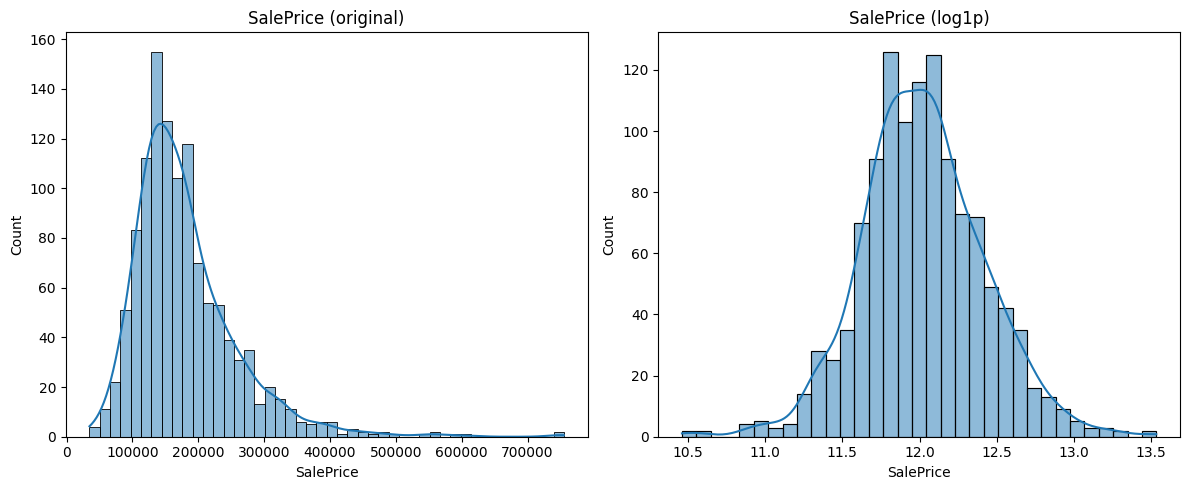

In [8]:
# 타겟(SalePrice) 분포 (원본, 로그 변환)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice (original)")

plt.subplot(1,2,2)
sns.histplot(np.log1p(train_df['SalePrice']), kde=True)
plt.title("SalePrice (log1p)")
plt.tight_layout()
plt.show()

In [9]:
# 상위 상관 변수 탐색
corr = train_df.corr(numeric_only=True)
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(10)
print(top_corr_features)

SalePrice       1.000000
OverallQual     0.785111
GrLivArea       0.710178
GarageCars      0.632622
GarageArea      0.618311
1stFlrSF        0.597729
TotalBsmtSF     0.595882
FullBath        0.577860
TotRmsAbvGrd    0.548795
YearRemodAdd    0.504817
Name: SalePrice, dtype: float64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

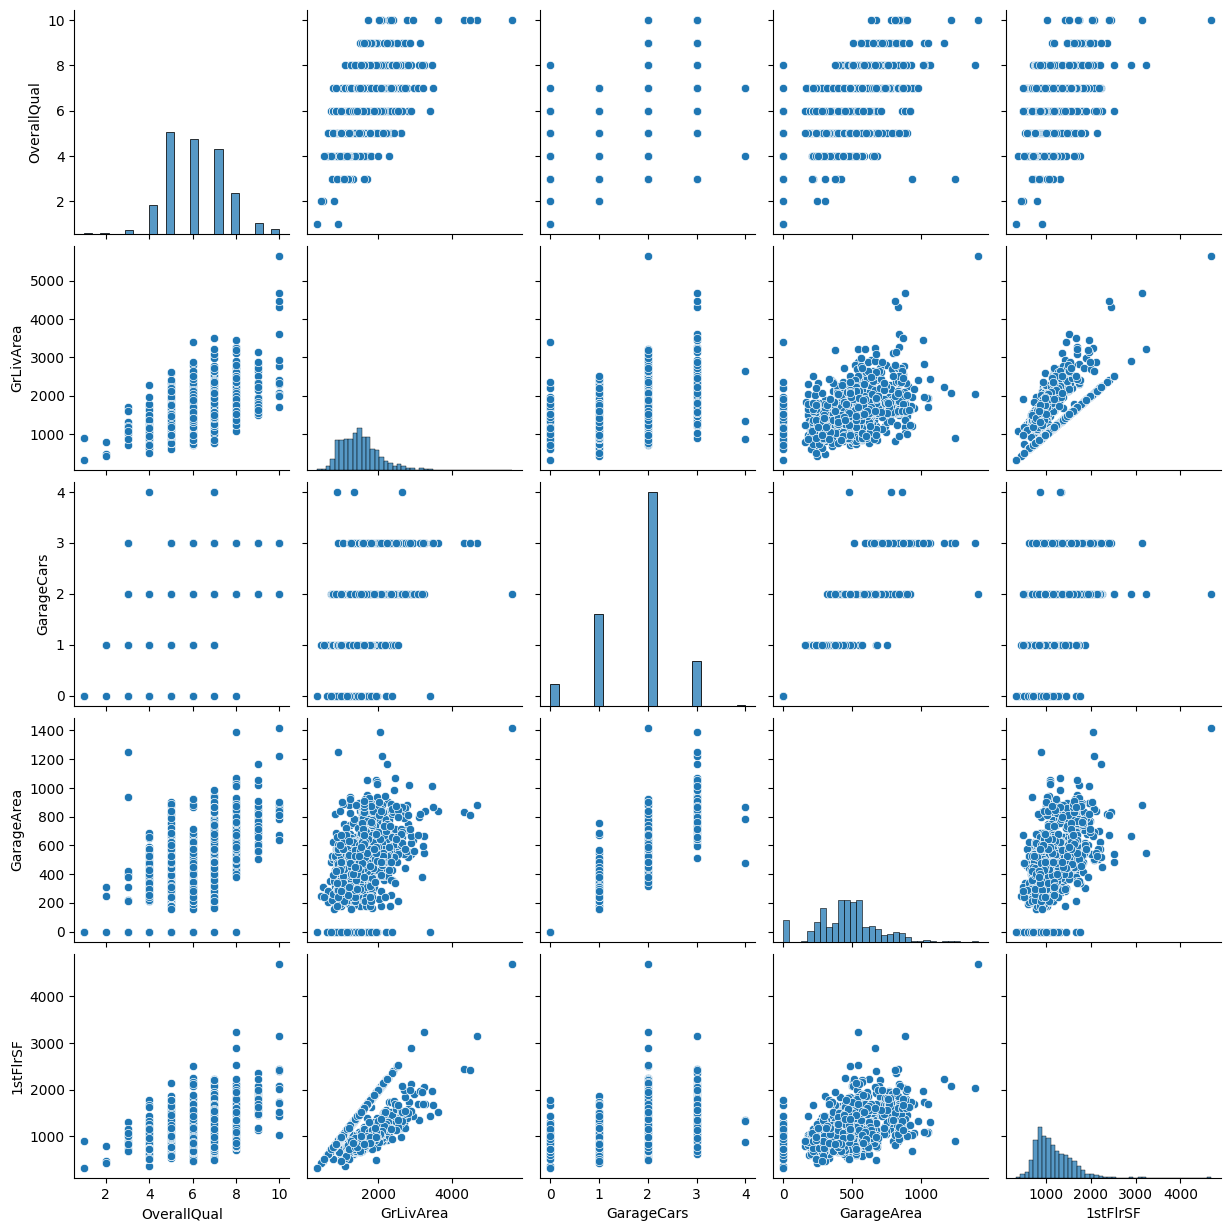

In [10]:
# 상위 변수 시각화
top_features = top_corr_features.index[1:6]
sns.pairplot(train_df, vars=top_features, y_vars='SalePrice')
plt.show()

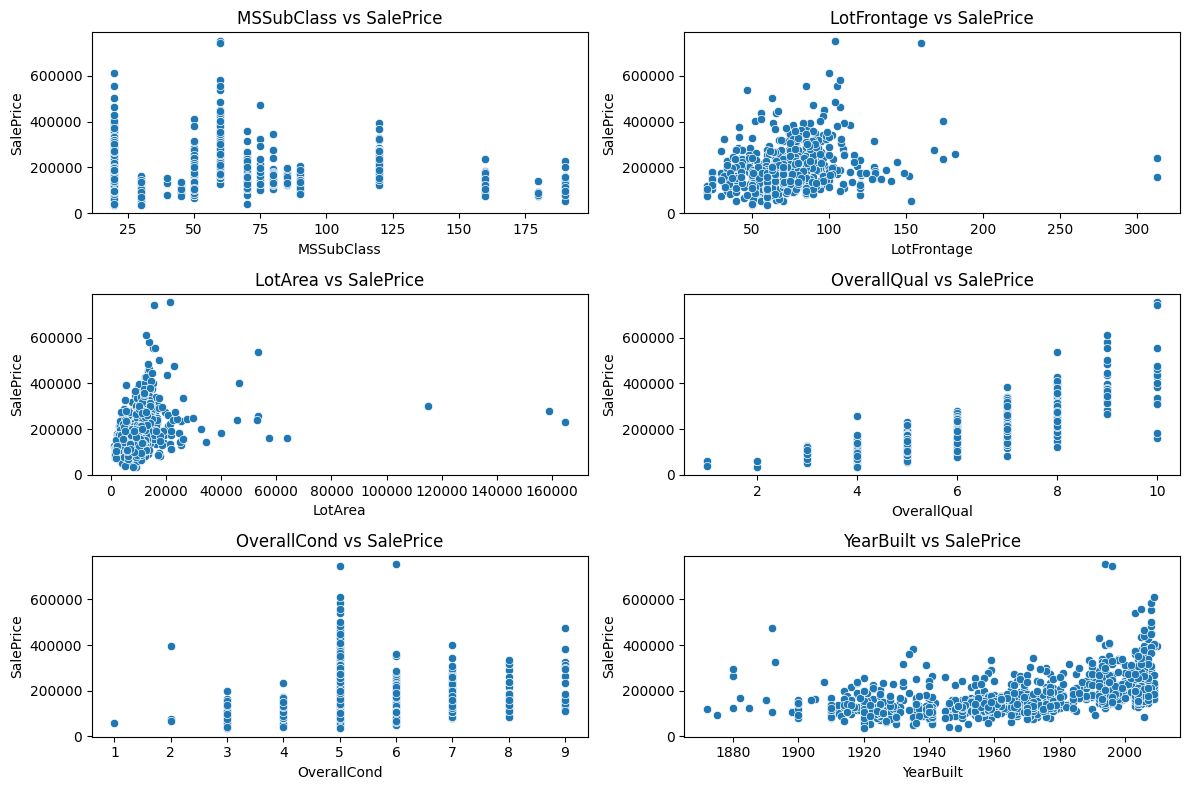

In [11]:
# 상위 6개 숫치형 변수와의 산점도
top_feats = corr.index[1:7].tolist()  # 1: because 0은 SalePrice 자체
plt.figure(figsize=(12,8))
for i, f in enumerate(top_feats):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=train_df[f], y=train_df['SalePrice'])
    plt.title(f"{f} vs SalePrice")
plt.tight_layout()
plt.show()

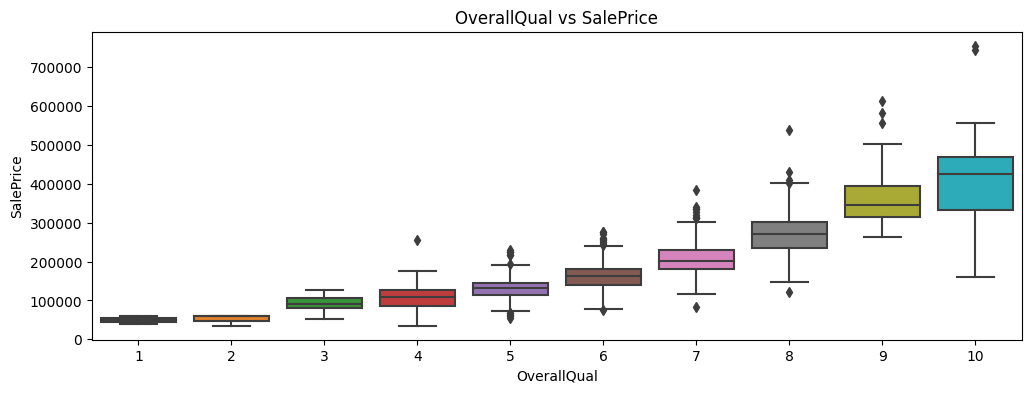

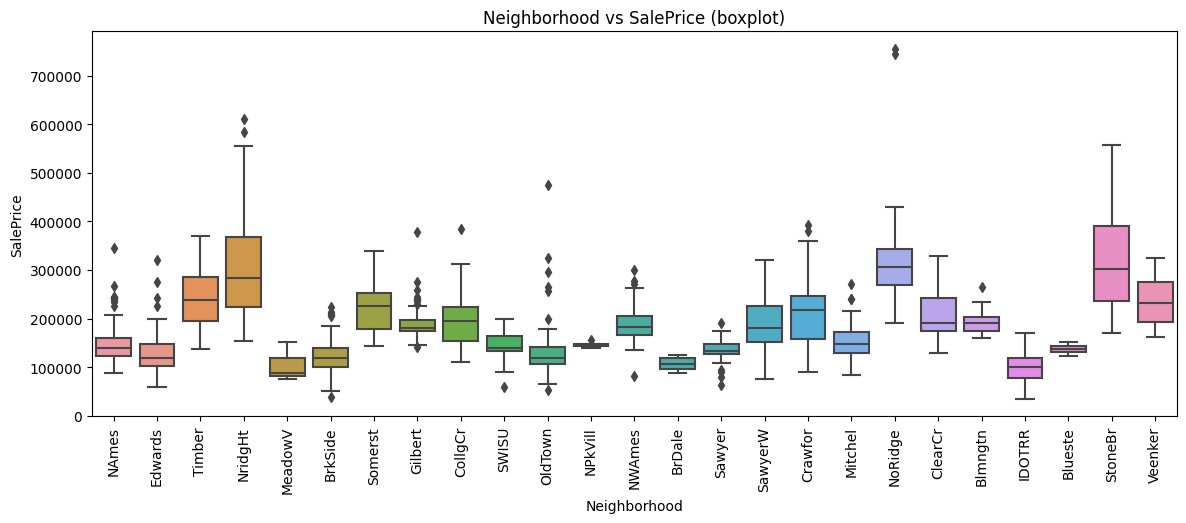

In [12]:
# 범주형 중 영향 클 수 있는 변수(예: OverallQual, Neighborhood 등) 분포 확인
plt.figure(figsize=(12,4))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title("OverallQual vs SalePrice")
plt.show()

plt.figure(figsize=(14,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.xticks(rotation=90)
plt.title("Neighborhood vs SalePrice (boxplot)")
plt.show()

**해석:**
* SalePrice는 오른쪽으로 꼬리가 긴 비대칭 분포(우편향) → 로그 변환 필요 가능성 있음.
* 상관성이 높은 변수들: OverallQual, GrLivArea, GarageCars, TotalBsmtSF, 1stFlrSF 등.
→ 모델의 주요 입력 변수로 의미 있음.

### 전처리

In [13]:
# 타겟 로그 변환 (RMSE가 큰 값에 치우치지 않도록 안정화)
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# 결측치 처리 (수치형은 중앙값, 범주형은 최빈값으로 처리)
train_df = train_df.fillna(train_df.median(numeric_only=True))
test_df = test_df.fillna(test_df.median(numeric_only=True))

for col in train_df.select_dtypes(include='object'):
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
for col in test_df.select_dtypes(include='object'):
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# 간단 이상치 제거 (GrLivArea가 매우 큰 값들)
train_df = train_df[train_df['GrLivArea'] < 4000]

# 인코딩
train_df = pd.get_dummies(train_df, drop_first=True)
test_df = pd.get_dummies(test_df, drop_first=True)

# 컬럼 정렬 맞추기
X = train_df.drop("SalePrice", axis=1)
y = train_df["SalePrice"]
test_df = test_df.reindex(columns=X.columns, fill_value=0)

# 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 모델 선택 및 비교

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    results[name] = rmse

print("Model RMSE Comparison:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")

Model RMSE Comparison:
LinearRegression: 16806504630.9552
Ridge: 0.1237
Lasso: 0.1234
RandomForest: 0.1460
GradientBoosting: 0.1259


→ Lasso가 가장 낮은 RMSE로 가장 우수.

### 앙상블 모델 결합

In [15]:
from sklearn.ensemble import VotingRegressor

best_models = [
    ('ridge', Ridge(alpha=1.0)),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

ensemble = VotingRegressor(best_models)
ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_val)

ensemble_rmse = mean_squared_error(y_val, ensemble_preds, squared=False)
print("Ensemble RMSE:", ensemble_rmse)

Ensemble RMSE: 0.11908764220110828


* VotingRegressor는 여러 모델의 예측값 평균을 통해 편향과 분산을 모두 완화.
* 보통 단일 모델보다 RMS가 소폭 개선됨.

### 하이퍼파라미터 튜닝 (성능 향상 시도)

In [16]:
from sklearn.model_selection import GridSearchCV

# Lasso 회귀 튜닝 
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(
    Lasso(max_iter=10000, random_state=42),
    lasso_params,
    cv=5,
    scoring='neg_root_mean_squared_error'
)
lasso_grid.fit(X_scaled, y)
print("\nBest Lasso alpha:", lasso_grid.best_params_)
print("Best Lasso RMSE:", -lasso_grid.best_score_)


Best Lasso alpha: {'alpha': 0.001}
Best Lasso RMSE: 0.11921085899217847


* Lasso의 alpha를 조정해 과적합 방지, 일반화 성능 향상.
* RMSE 개선됨.

### 테스트 데이터 예측 및 제출

In [17]:
# 최적 하이퍼파라미터 기반 최종 모델 (GridSearchCV 결과)
best_alpha = lasso_grid.best_params_['alpha']
final_model = Lasso(alpha=best_alpha, max_iter=10000, random_state=42)
final_model.fit(X_scaled, y)

# 테스트 데이터 스케일링
test_scaled = scaler.transform(test_df)

# 로그 변환된 y를 예측 후, expm1으로 역변환
test_preds = np.expm1(final_model.predict(test_scaled))

In [18]:
# 제출 파일 생성
submission = pd.DataFrame({
    "Id": pd.read_csv('/kaggle/input/modu-ds6-house-prices-prediction/test.csv')["Id"],
    "SalePrice": test_preds
})

submission.to_csv("/kaggle/working/submission.csv", index=False)
submission.head()

,Id,SalePrice
0,86,256123.884045
1,227,260110.118698
2,492,144294.186300
3,64,123877.189162
4,576,113930.106553
